#### Mohamad Quteifan, Kayla Thompson, Gloria Moore
#### Professor: Brett Werner
#### DSC 630: Predictive Analytics



# Problem Statement: 



# Exploratory Data Analysis

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
from scipy import stats
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score

# Data Frame Analysis

The following data set was extratect from: https://www.kaggle.com/c/nfl-big-data-bowl-2021/data
This data frame contains play-level information for each game.
Variables description can be found using the link provided
Following section looks to import data set in Pandas Data frame as well as describe the principal variables that we have defined

In [2]:
df = pd.read_csv("plays.csv")

In [3]:
df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


In [4]:
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [5]:
print("The shape of the data:\n",
      df.shape, 
      "\nThe first 5 rows are:\n", 
      df.head(), 
      "\nThe last 5 rows are:\n",
      df.tail(), 
      "\nThe column names are:\n",
      df.columns)
      

The shape of the data:
 (19239, 27) 
The first 5 rows are:
        gameId  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   
2  2018090600     168  (13:05) (Shotgun) M.Ryan pass incomplete short...   
3  2018090600     190  (13:01) (Shotgun) M.Ryan pass deep left to J.J...   
4  2018090600     256  (10:59) (Shotgun) M.Ryan pass incomplete short...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   
2        1     2         10            ATL  play_type_pass          PHI   
3        1     3         10            ATL  play_type_pass          PHI   
4        1     3          1            ATL  play_type_pass          PHI   

   yardlineNumber  ... preSnapHo

# Part 1: Variable Analysis

## Variable 1rst Selection:
*Guys I think we should explain here a bit why are we taking these variables, I thought to leave this section to discuss with you*

In [6]:
print(
    "Yards To Go :\n",df["yardsToGo"].value_counts(),
    "Play Type:\n", df["playType"].value_counts(),
    "Offense Formation:\n", df["offenseFormation"].value_counts(),
    "Offensive Personnel:\n", df["personnelO"].value_counts(),
    "Defenders In The Box:\n", df["defendersInTheBox"].value_counts(),
    "Number Of Pass Rushers:\n", df["numberOfPassRushers"].value_counts(),
    "Defensive personnel:\n", df["personnelD"].value_counts(),
    "The Result of Pass Play:\n", df["passResult"].value_counts(),
    "Offense Play Result:\n", df["offensePlayResult"].value_counts(),
    "Play Results:\n", df["playResult"].value_counts(),
     )

Yards To Go :
 10    8684
6     1071
7     1047
8     1003
5      992
9      932
4      852
3      769
2      618
1      522
11     432
15     421
12     366
20     310
13     257
14     224
16     159
17     156
18     127
19     102
21      45
22      37
25      35
23      24
30      13
24      12
26      10
28       7
27       4
29       3
32       2
41       1
38       1
33       1
Name: yardsToGo, dtype: int64 Play Type:
 play_type_pass       17346
play_type_sack        1260
play_type_unknown      633
Name: playType, dtype: int64 Offense Formation:
 SHOTGUN       12627
SINGLEBACK     2790
EMPTY          2428
I_FORM          915
PISTOL          251
JUMBO            51
WILDCAT          36
Name: offenseFormation, dtype: int64 Offensive Personnel:
 1 RB, 1 TE, 3 WR                            13716
1 RB, 2 TE, 2 WR                             2737
2 RB, 1 TE, 2 WR                             1083
1 RB, 3 TE, 1 WR                              406
1 RB, 0 TE, 4 WR                        

In [7]:
#    Mohamad Quteifan
#"Yards To Go :\n",df["yardsToGo"].value_counts(),
#    "Play Type:\n", df["playType"].value_counts(),
#    "Offense Formation:\n", df["offenseFormation"].value_counts(),
#    "Offensive Personnel:\n", df["personnelO"].value_counts(),

# Kayla Thompson
    #"Defenders In The Box:\n", df["defendersInTheBox"].value_counts(),
    #"Number Of Pass Rushers:\n", df["numberOfPassRushers"].value_counts(),
    #"Defensive personnel:\n", df["personnelD"].value_counts(),

#Gloria Moore
    #"The Result of Pass Play:\n", df["passResult"].value_counts(), The resut
    #"Play Results:\n", df["playResult"].value_counts(),


#### Quick Variable analysis: 
We made a few key discoveries running through the values of each feature(features that matter for the researh). One key discover comes from the playType feature. We can see that all the plays are passing plays and the data does not contain any running plays. I have to review the "play_type_unknown" value and ensure that it is a pass play. The other value, "play_type_sack" is a negative result of the pass play and it is still classified as a pass play. This was not known before and will change the overall problem statement. 

KEY TAKEAWAYS:
1. No Running Plays

2. Shotgun most common play

3. Most common offensive formation: 1 RB, 1 TE, 3 WR, 2nd most common: 1 RB, 2 TE, 2 WR

4. There usually 6-7 defenders in the box but this varies -- 4 to 8 is rather consistent.

5. Usually 4 defenders rush the passer

6. Most common defensive formation: 4 DL, 2 LB, 5 DB, with 3 DL, 3 LB, 5 DB as the runner up
- defense formations deviate more than offensive formations.

7. Defense usually wins the battle with the offense on most plays, the most common play result ==0

8. More completed passes than 

9. 

10. 

11. 


Look at what the value "play_type_unknown" represents

In [8]:
df_copy = df.copy()
df_copy.loc[(df_copy['playType'] == "play_type_unknown")]
df_copy.loc[(df_copy['playType'] == "play_type_unknown")]


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18606,2018090600,1226,(8:23) (Shotgun) N.Foles pass incomplete short...,2,3,7,PHI,play_type_unknown,ATL,17,...,NaN,NaN,NaN,DPI,ATL 21,I,0,8,1.169181,True
18607,2018090600,1715,(1:50) (Shotgun) N.Foles pass short right to N...,2,1,10,PHI,play_type_unknown,PHI,24,...,NaN,NaN,NaN,DH,ATL 21,C,7,5,0.169598,False
18608,2018090600,2305,(13:44) (Shotgun) N.Foles pass incomplete shor...,3,1,10,PHI,play_type_unknown,PHI,36,...,NaN,NaN,NaN,ICT,ATL 23,I,0,5,0.309866,False
18609,2018090600,3626,(8:31) (Shotgun) N.Foles pass short right to N...,4,3,4,PHI,play_type_unknown,PHI,31,...,NaN,NaN,NaN,OPI,PHI 86,C,10,-10,-0.694743,False
18610,2018090600,4439,(:06) (Shotgun) M.Ryan pass incomplete short r...,4,4,10,ATL,play_type_unknown,PHI,10,...,NaN,NaN,NaN,ICT,PHI 58,I,0,5,1.383655,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


They are just pass plays that are either short or incompete. Confirms our orginal conclusion that the data is made up of only pass plays(success + unsuccessful pass plays). What needs to be done with the play type variable is convert to only one value, pass play. This will be much easier to work with and containing those other 2 values is only going to slow down the model and analysis. For the purpose of this study as suck is an unsuccessful pass play. 

### Check empty for empty or Nan values

In [9]:
msno.bar(df)
plt.figure(figsize=(10,10))
plt.xlabel('Columns', fontsize = 30 )
plt.ylabel('Values')
plt.title('Missing Values', fontsize = 30)
# Show the figure
plt.show()

NameError: name 'msno' is not defined

In [13]:
print("There are: ", df["yardsToGo"].isnull().values.sum(), "empty values in the Yards to go feature",
      "\nThere are: ", df["playType"].isnull().values.sum(), "empty values in the Play Type feature",
      "\nThere are: ", df["offenseFormation"].isnull().values.sum(), "empty values in the offense Formation feature",
      "\nThere are: ", df["personnelO"].isnull().values.sum(), "empty values in the Offensive personnel feature",
      "\nThere are: ", df["defendersInTheBox"].isnull().values.sum(), "empty values in the defenders in the box feature",
      "\nThere are: ", df["numberOfPassRushers"].isnull().values.sum(), "empty values in the number Of Pass Rushers feature",
      "\nThere are: ", df["personnelD"].isnull().values.sum(), "empty values in the Defensive personnel feature",
      "\nThere are: ", df["passResult"].isnull().values.sum(), "empty values in the Result of the play feature",
      "\nThere are: ", df["offensePlayResult"].isnull().values.sum(), "empty values in the Result of the offensive Play feature",
      "\nThere are: ", df["playResult"].isnull().values.sum(), "empty values in the play result feature",
      "\nThere are: ", df["down"].isnull().values.sum(),  "empty values in the downs feature")

There are:  0 empty values in the Yards to go feature 
There are:  0 empty values in the Play Type feature 
There are:  141 empty values in the offense Formation feature 
There are:  29 empty values in the Offensive personnel feature 
There are:  62 empty values in the defenders in the box feature 
There are:  633 empty values in the number Of Pass Rushers feature 
There are:  29 empty values in the Defensive personnel feature 
There are:  2 empty values in the Result of the play feature 
There are:  0 empty values in the Result of the offensive Play feature 
There are:  0 empty values in the play result feature 
There are:  0 empty values in the downs feature


There are missing values in the data frame and we have review the offensive formation, offensive personnel, defenders in the box, pass rushers column, Defensive Personnel column and result of the play column. The result of the play column maybe one that we may need to remove from the data because it may lead to issues with the model. 

###  Feature 1 Offensive Personnel (with missing values) analysis and distributions

In [14]:
df_copy1 = df.copy()
off_per = df_copy["personnelO"]
off_per

0        2 RB, 1 TE, 2 WR
1        1 RB, 1 TE, 3 WR
2        2 RB, 1 TE, 2 WR
3        1 RB, 1 TE, 3 WR
4        2 RB, 3 TE, 0 WR
               ...       
19234    1 RB, 1 TE, 3 WR
19235    1 RB, 1 TE, 3 WR
19236    1 RB, 1 TE, 3 WR
19237    1 RB, 1 TE, 3 WR
19238    1 RB, 1 TE, 3 WR
Name: personnelO, Length: 19239, dtype: object

In [15]:
off_per.isnull().values.sum()
# mising values, we already knew from earlier.
df1 = df_copy1[off_per.isna()]
df1


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18629,2018090906,1188,(11:30) (Shotgun) R.Fitzpatrick pass incomplet...,2,3,7,TB,play_type_unknown,NO,15,...,NaN,NaN,NaN,DH;OPI,NO 21;TB 10,I,0,0,-0.000288,False
18658,2018091602,2823,(12:54) (Shotgun) A.Rodgers pass deep right in...,4,1,10,GB,play_type_unknown,GB,36,...,NaN,NaN,NaN,ILM;DH,GB 18;MIN 22,IN,0,0,0.006909,False
18690,2018091611,3501,(3:53) (Shotgun) D.Carr pass deep right to A.C...,4,2,6,OAK,play_type_unknown,OAK,40,...,NaN,NaN,NaN,DPI;OPI,DEN 29;OAK 89,C,29,0,-0.000406,True
18698,2018092303,950,(13:48) E.Manning pass short right to C.Latime...,2,1,10,NYG,play_type_unknown,HOU,27,...,NaN,NaN,NaN,ICT;TAU,HOU 22;NYG 87,C,14,0,-0.001846,False
18699,2018092303,3099,(10:05) (Shotgun) D.Watson pass incomplete dee...,4,1,10,HOU,play_type_unknown,NYG,20,...,NaN,NaN,NaN,OH;DH,HOU 66;NYG 20,I,0,0,0.000406,False
18722,2018092306,1098,(12:26) (Shotgun) R.Tannehill pass incomplete ...,2,3,9,MIA,play_type_unknown,OAK,34,...,NaN,NaN,NaN,OH;RPS,MIA 86;OAK 73,I,0,0,0.002487,False
18775,2018100701,3541,(8:08) (Shotgun) C.Newton pass incomplete shor...,4,1,10,CAR,play_type_unknown,CAR,25,...,NaN,NaN,NaN,OH;RPS,CAR 74;NYG 72,I,0,0,0.002345,False
18780,2018100704,1490,(9:13) M.Stafford pass deep right to M.Jones t...,2,2,8,DET,play_type_unknown,DET,48,...,NaN,NaN,NaN,DPI;ILH,GB 20;DET 60,C,39,0,0.004934,True
18790,2018100711,2987,(4:36) G.Fant reported in as eligible. R.Wils...,3,1,10,SEA,play_type_unknown,SEA,36,...,NaN,NaN,NaN,DH;ING,LA 22;SEA 3,I,0,0,-0.000991,False
18832,2018101412,2923,(:17) (Shotgun) T.Brady pass incomplete deep r...,3,2,9,NE,play_type_unknown,NE,26,...,NaN,NaN,NaN,DH;OPI,KC 23;NE 11,I,0,0,0.000360,False


In [16]:
df1.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

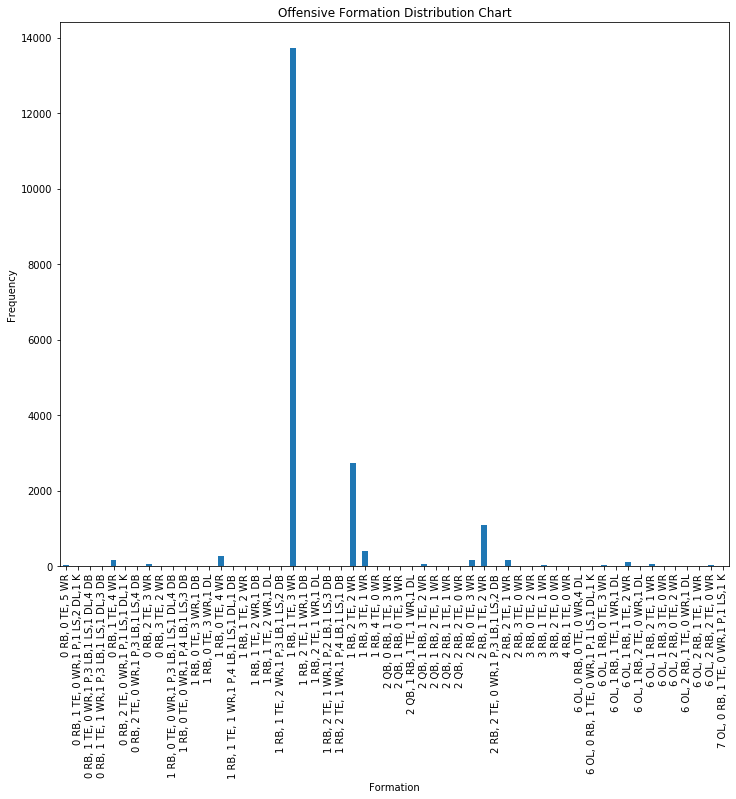

In [17]:
plt.figure(figsize=(12,10))
df_copy1.groupby("personnelO").size().plot(kind='bar')
# Label the axes
plt.xlabel("Formation")
plt.ylabel("Frequency")
plt.title("Offensive Formation Distribution Chart")
# Show the figure
plt.show()

### Analysis on Offensive personnell
The issue with the feature is that *there* is no big variation in the data, most of the time the offense is going to line up in the standard formation(1RB:1TE:3WR) with the distant second being the 2 TE formation(1RB:2TE:2WR).

### Feature 2: Yards To Go (with missing values) analysis and distributions

In [18]:
df_copy1["yardsToGo"].value_counts()


10    8684
6     1071
7     1047
8     1003
5      992
9      932
4      852
3      769
2      618
1      522
11     432
15     421
12     366
20     310
13     257
14     224
16     159
17     156
18     127
19     102
21      45
22      37
25      35
23      24
30      13
24      12
26      10
28       7
27       4
29       3
32       2
41       1
38       1
33       1
Name: yardsToGo, dtype: int64

The distribution between 1-10 are the most common, the other are not as common. The data is more evenly distrubted compared to 

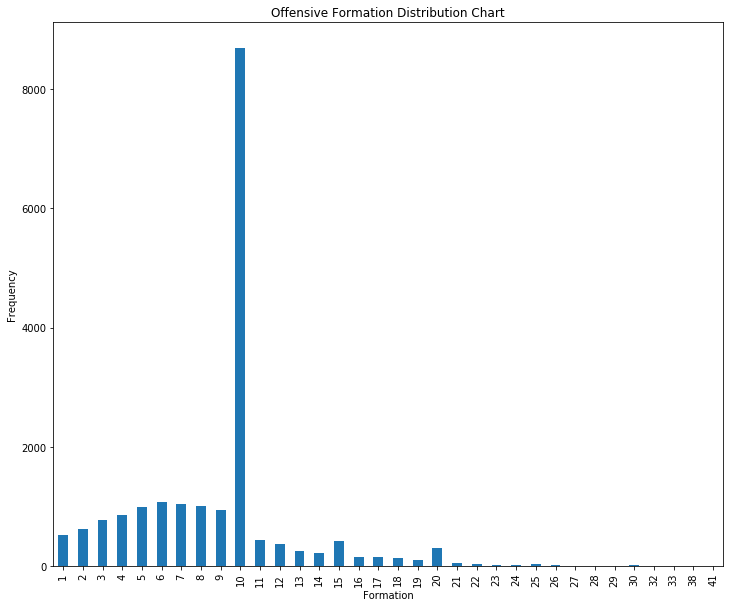

In [19]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("yardsToGo").size().plot(kind='bar')
# Label the axes
plt.xlabel("Formation")
plt.ylabel("Frequency")
plt.title("Offensive Formation Distribution Chart")
# Show the figure
plt.show()

Now reviewing the graph, we can that the most common is 10. This makes the most sense because anytime you get a first down, you are back to having 10 yards to go. 


### Are most of the 10 yards to go on first down?
We will use the play result to figure what down it usual is when there are 10 yards to go. This feature may not even be included in our models.

In [20]:
down = df_copy1.loc[(df_copy1['down'] == 1)]
down_10 = df_copy1.loc[(df_copy1['down'] == 1)& (df_copy1['yardsToGo'] == 10)]
print(down.down.value_counts())
to_go = down_10.down.value_counts().sum()/ down.down.value_counts().sum() 
print("%.2f%% of all plays with 10 yards to go are first downs." % (to_go *100))
#we can do more analysis here, how many yards to go are there on 2nd down or 3rd down usually? 



1    7405
Name: down, dtype: int64
89.70% of all plays with 10 yards to go are first downs.


This is not surprising, if its first down then the offense is 10 yards to go. We can do more analysis here, how many yards to go are there on 2nd down or 3rd down usually? 


###  Feature 3 Play type (with missing values) analysis and distributions

In [21]:
df_copy1['playType']

0           play_type_pass
1           play_type_pass
2           play_type_pass
3           play_type_pass
4           play_type_pass
               ...        
19234    play_type_unknown
19235    play_type_unknown
19236    play_type_unknown
19237    play_type_unknown
19238    play_type_unknown
Name: playType, Length: 19239, dtype: object

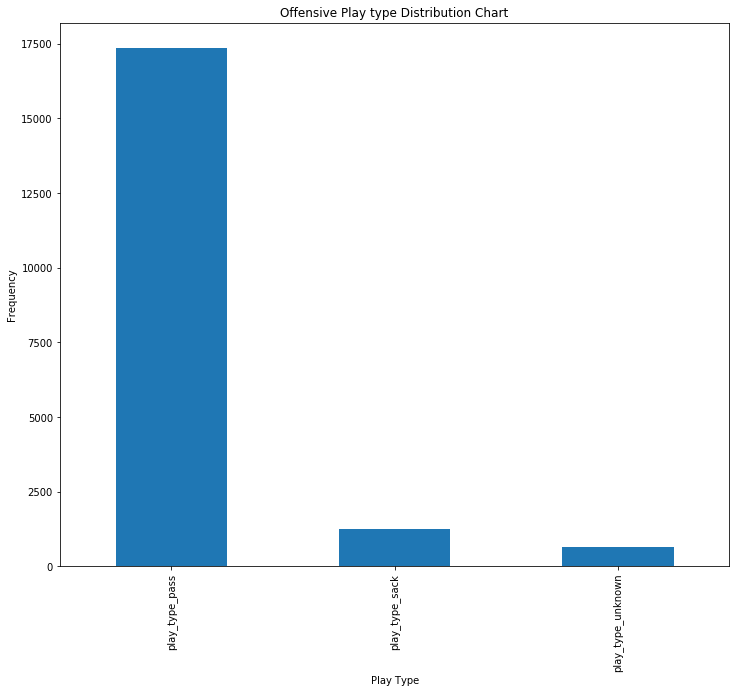

In [22]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("playType").size().plot(kind='bar')
# Label the axes
plt.xlabel("Play Type")
plt.ylabel("Frequency")
plt.title("Offensive Play type Distribution Chart")
# Show the figure
plt.show()

### Play Type Analysis
This feature will be removed from the research, all the plays in the data that we have are passing plays, even if they end in a sack. We determined unknown plays were passing plays earlier and the distribution indicates that there is no variation. Sacks are a result of a failed passing play. 

### Feature 4: Offensive formation (with missing values) analysis and distributions

In [23]:
df_copy1["offenseFormation"]



0            I_FORM
1        SINGLEBACK
2           SHOTGUN
3           SHOTGUN
4           SHOTGUN
            ...    
19234    SINGLEBACK
19235       SHOTGUN
19236       SHOTGUN
19237    SINGLEBACK
19238       SHOTGUN
Name: offenseFormation, Length: 19239, dtype: object

In [24]:
df_copy1["offenseFormation"].value_counts()


SHOTGUN       12627
SINGLEBACK     2790
EMPTY          2428
I_FORM          915
PISTOL          251
JUMBO            51
WILDCAT          36
Name: offenseFormation, dtype: int64

Reviewing the value counts we can already see the variation is higher than most of the other features 

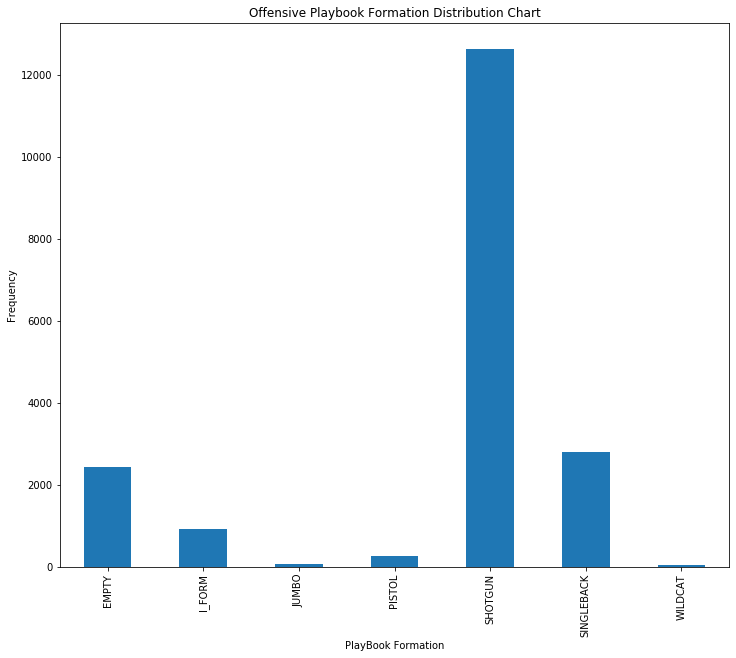

In [25]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("offenseFormation").size().plot(kind='bar')
# Label the axes
plt.xlabel("PlayBook Formation")
plt.ylabel("Frequency")
plt.title("Offensive Playbook Formation Distribution Chart")
# Show the figure
plt.show()

### Offensive Formation feature Analysis
This is no surprise as we can see in our earlier methods we determined that shotgun is the most common pass play formation and a shotgun formation consist of 1 rb 1 TE and 3 WR, which is the most common value in personnelO feature. These two features are identical and we will be using only one feature to represent the offensive formation. 



### Feature 5 Defenders In The Box (with missing values) analysis and distributions

In [26]:
df_copy1['defendersInTheBox']

0        7.0
1        7.0
2        6.0
3        6.0
4        8.0
        ... 
19234    7.0
19235    6.0
19236    6.0
19237    7.0
19238    6.0
Name: defendersInTheBox, Length: 19239, dtype: float64

In [27]:
df_copy1["defendersInTheBox"].value_counts()

6.0     8825
7.0     4401
5.0     3450
4.0     1170
8.0     1059
3.0      133
9.0       77
10.0      31
11.0      15
2.0       14
1.0        2
Name: defendersInTheBox, dtype: int64

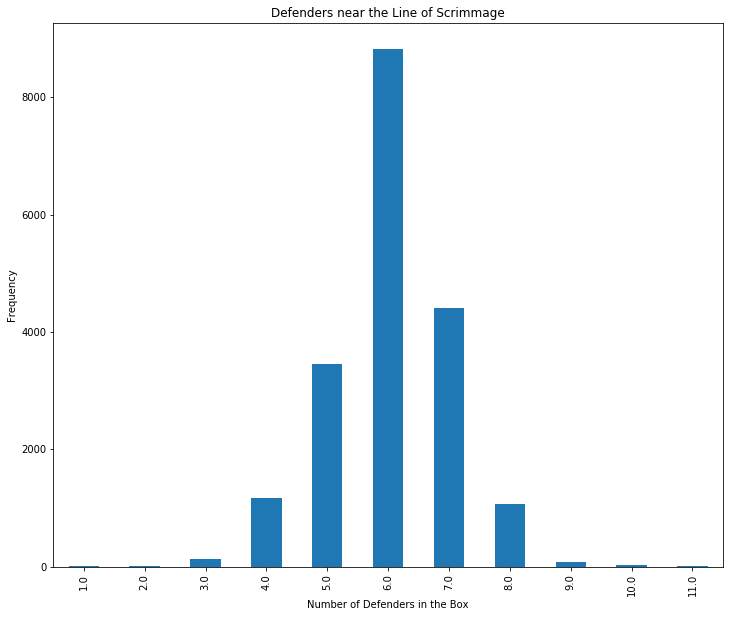

In [28]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("defendersInTheBox").size().plot(kind='bar')
# Label the axes
plt.xlabel("Number of Defenders in the Box")
plt.ylabel("Frequency")
plt.title("Defenders near the Line of Scrimmage")
# Show the figure
plt.show()

### Defenders in the box Analysis
There are usually between 5-7 defenders near the line of scrimmage, with 6 being the most common. What would be interesting is to see if the number of defenders in the box correlates/has a relationship with sacks. 

# Defenders in the box == more pass rushers? what about sacks? See if there is a relationship


### Feature 6: number Of Pass Rushers (with missing values) analysis and distributions

In [29]:
df_copy1['numberOfPassRushers']

0        4.0
1        4.0
2        4.0
3        5.0
4        6.0
        ... 
19234    NaN
19235    NaN
19236    NaN
19237    NaN
19238    NaN
Name: numberOfPassRushers, Length: 19239, dtype: float64

In [30]:
df_copy1['numberOfPassRushers'].value_counts()

4.0     11521
5.0      3646
3.0      1597
6.0      1136
2.0       253
7.0       242
0.0       106
1.0        73
8.0        30
10.0        1
9.0         1
Name: numberOfPassRushers, dtype: int64

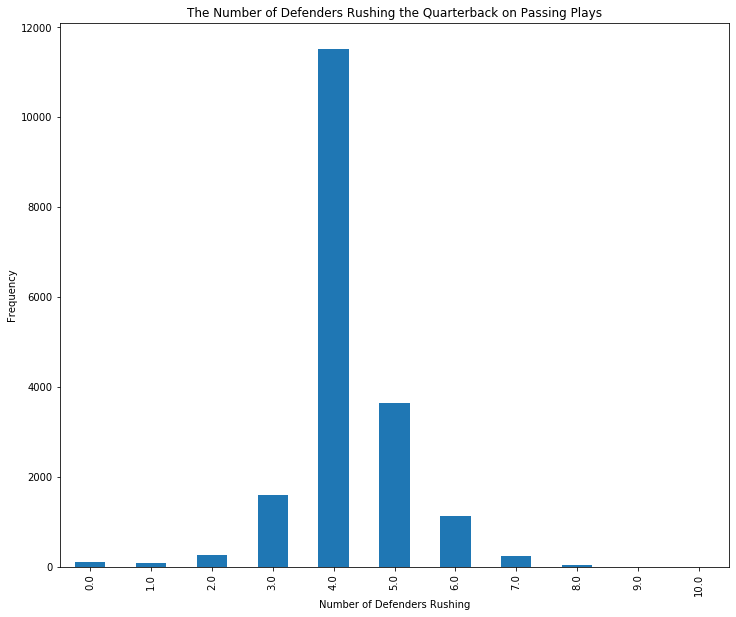

In [31]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("numberOfPassRushers").size().plot(kind='bar')
# Label the axes
plt.xlabel("Number of Defenders Rushing")
plt.ylabel("Frequency")
plt.title("The Number of Defenders Rushing the Quarterback on Passing Plays")
# Show the figure
plt.show()

### Feature Number of Pass Rushers Analysis
It would be interesting to see if there are any relationships between number of rushers, number of defenders in the box and a sack play result. Most NFL coaches either have 3 or 4 linemen on the defensive line. I would consider a 5 rushers to be a blitz. 

### Feature 6: Defensive Formation (with missing values) analysis and distributions

In [32]:
df_copy1['personnelD']


0        4 DL, 2 LB, 5 DB
1        4 DL, 2 LB, 5 DB
2        4 DL, 2 LB, 5 DB
3        4 DL, 1 LB, 6 DB
4        6 DL, 3 LB, 2 DB
               ...       
19234    2 DL, 4 LB, 5 DB
19235    2 DL, 4 LB, 5 DB
19236    1 DL, 5 LB, 5 DB
19237    2 DL, 3 LB, 6 DB
19238    4 DL, 1 LB, 6 DB
Name: personnelD, Length: 19239, dtype: object

In [33]:
df_copy1['personnelD'].value_counts()

4 DL, 2 LB, 5 DB                    6652
3 DL, 3 LB, 5 DB                    3103
4 DL, 3 LB, 4 DB                    2407
2 DL, 4 LB, 5 DB                    2109
4 DL, 1 LB, 6 DB                    1104
3 DL, 2 LB, 6 DB                    1047
2 DL, 3 LB, 6 DB                     917
3 DL, 4 LB, 4 DB                     743
1 DL, 4 LB, 6 DB                     311
1 DL, 5 LB, 5 DB                     266
1 DL, 3 LB, 7 DB                     102
5 DL, 2 LB, 4 DB                      93
3 DL, 1 LB, 7 DB                      82
2 DL, 2 LB, 7 DB                      71
0 DL, 4 LB, 7 DB                      32
4 DL, 0 LB, 7 DB                      24
4 DL, 4 LB, 3 DB                      23
0 DL, 5 LB, 6 DB                      17
5 DL, 3 LB, 3 DB                      14
5 DL, 1 LB, 5 DB                      13
6 DL, 4 LB, 1 DB                      12
6 DL, 3 LB, 2 DB                      12
0 DL, 6 LB, 5 DB                       6
2 DL, 3 LB, 5 DB, 1 WR                 4
4 DL, 5 LB, 2 DB

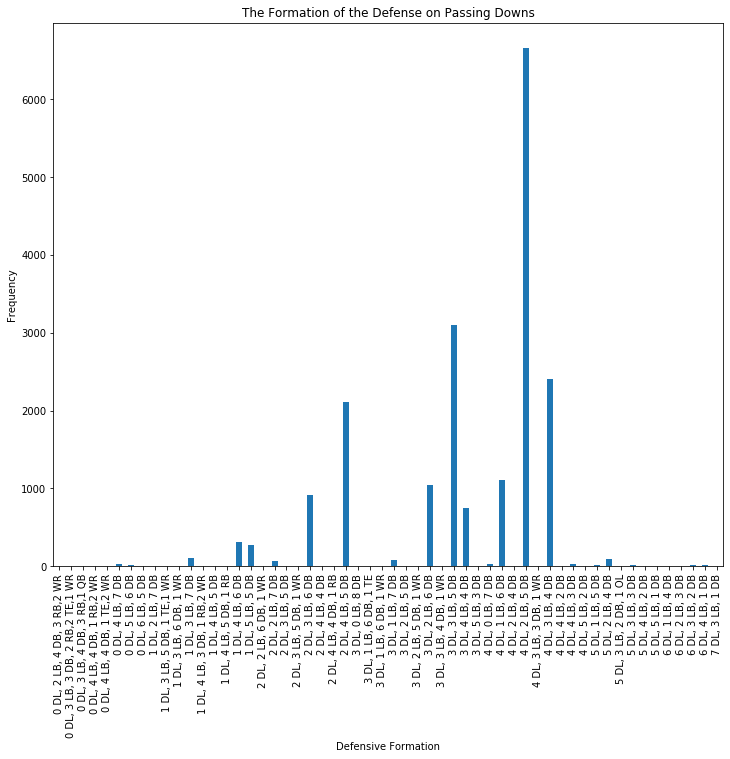

In [34]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("personnelD").size().plot(kind='bar')
# Label the axes
plt.xlabel("Defensive Formation")
plt.ylabel("Frequency")
plt.title("The Formation of the Defense on Passing Downs")
# Show the figure
plt.show()

### Feature Defensive Formation Analysis
In the bar chart we can conclude that there are in fact more defensive formations than offensive formation (it's not even close). Although the variation is more than the offensive formation we can see that 4DL 2 LB and 5 DB is the most common formation. I would say that this is a cover 3 with an extra corner in the slot. Knowing this data consists of passing plays it would make sense that that the defense would have an extra corner out. A quick glance analysis I would say that defenses play 5 DBs when the offense is in shotgun. 

# Question: Do shotgun plays == 5 or more DBs defensive formation? 

### Feature 7: Play Result (with missing values) analysis and distributions
Our playresult variable that present the number of net yards gained in each play

In [35]:
print("Describe Play Result")
print(df['playResult'].describe())

Describe Play Result
count    19239.000000
mean         6.469047
std         10.566605
min        -78.000000
25%          0.000000
50%          4.000000
75%         11.000000
max         97.000000
Name: playResult, dtype: float64


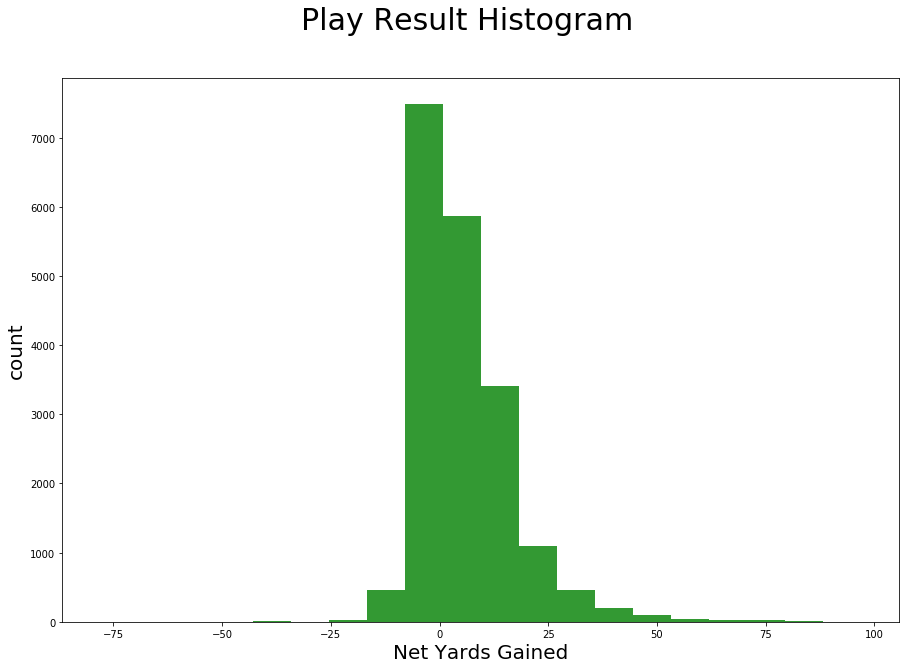

In [36]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots()


plt.hist(df['playResult'], bins=20, color="green", alpha=0.8)
plt.xlabel("Net Yards Gained", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.suptitle("Play Result Histogram", fontsize=30)

plt.show()

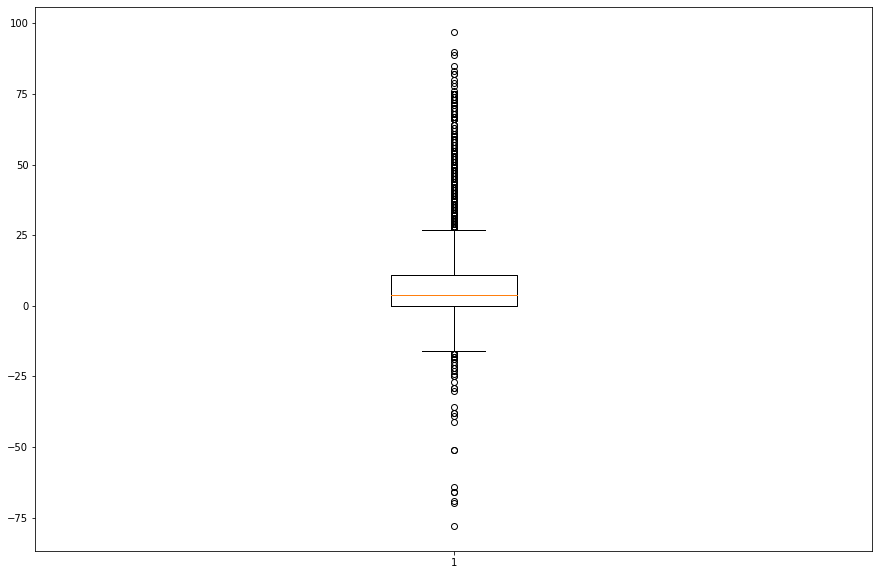

In [37]:
plt.boxplot(df['playResult'])

plt.show()
    

In [38]:
print("Describe Pass Result")
print(df['passResult'].describe())

Describe Pass Result
count     19237
unique        5
top           C
freq      11370
Name: passResult, dtype: object


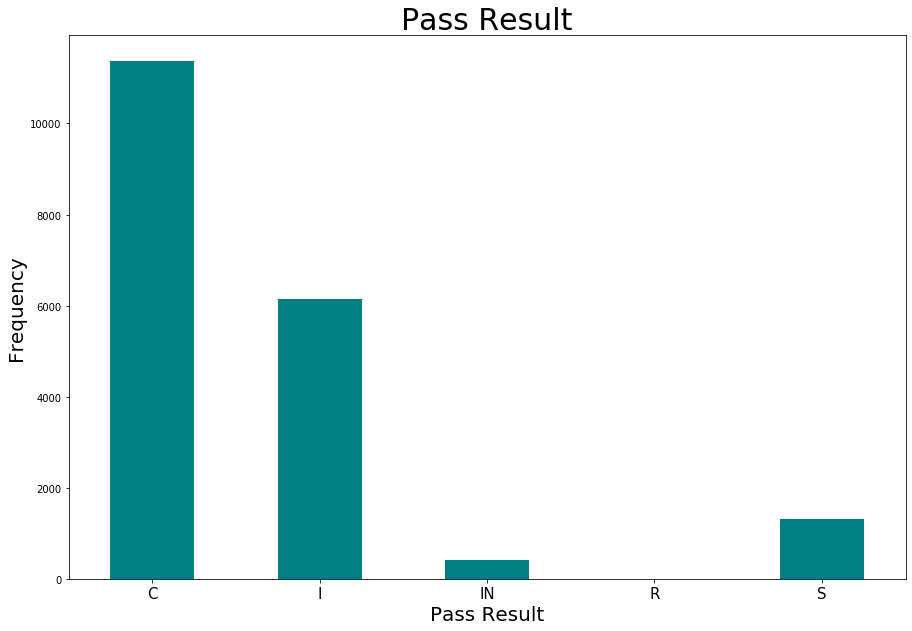

In [39]:
df.groupby("passResult").size().plot(kind='bar', color="teal")
plt.xlabel("Pass Result", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(rotation = 0, fontsize=15)
plt.title("Pass Result", fontsize=30)

plt.show()

C:\Users\Gloria\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


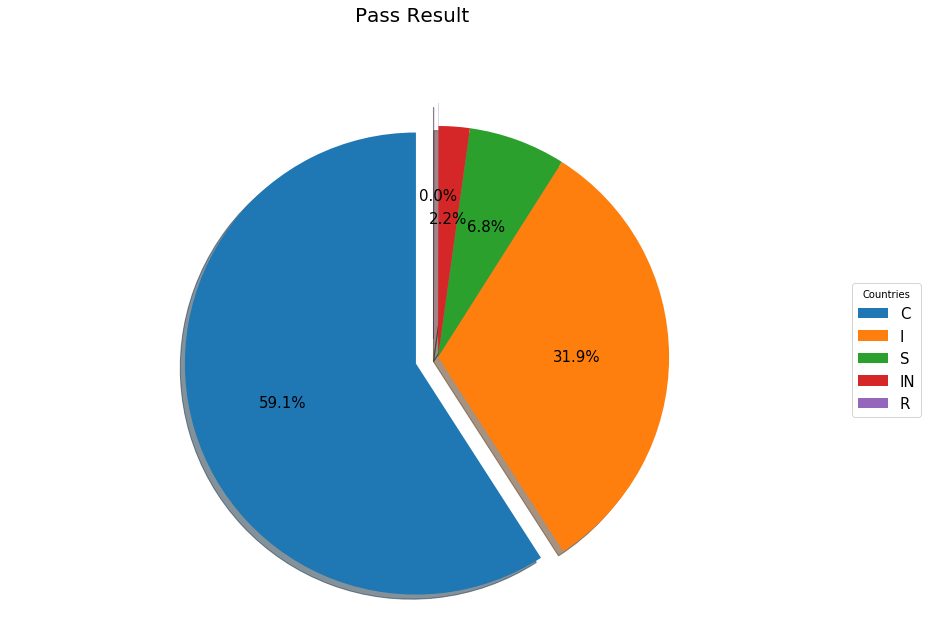

In [40]:
explode = (0.1, 0, 0, 0, 0.1)
plt.pie(df.passResult.value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15}, pctdistance=0.6, explode=explode)
plt.legend(df.passResult.value_counts().index, labels= df.passResult.value_counts().index, title="Countries",loc="center left", bbox_to_anchor=(1.0, 0, 0.5, 1), fontsize=15)
plt.axis('equal') 
plt.suptitle('Pass Result', fontsize = 20)
plt.show()

Text(0.5, 0.98, 'Box Plot Attendance by Month')

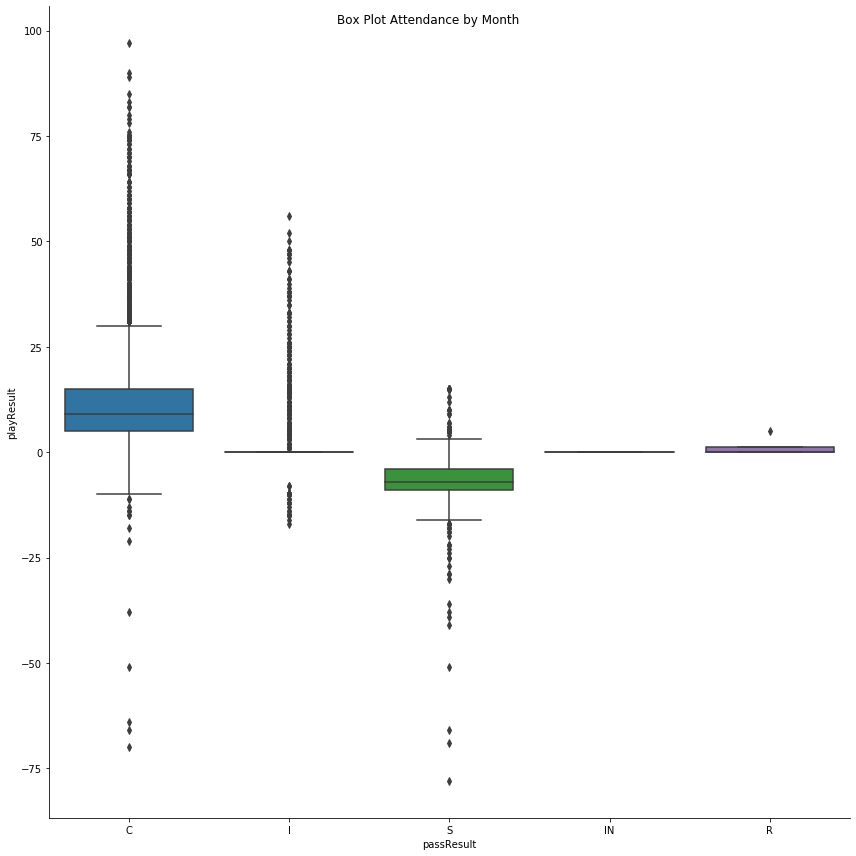

In [41]:
ax = sns.catplot(x='passResult', y='playResult', kind = 'box', data = df, height=12, aspect=1)
ax.fig.suptitle('Box Plot Attendance by Month')

To begin our analysis, we will use an l apply to add an outcome column to the data set. This is the column we will use as our dependent variable. If the play results in any sort of positive yardage we counted that as a success 

In [42]:
df['outcome'] = df['playResult'].apply(lambda c: 1 if c > 0 else 0)

df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,outcome
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,1
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,0
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False,0
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False,1
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False,0


Text(0.5, 1.0, 'Outcome Counts')

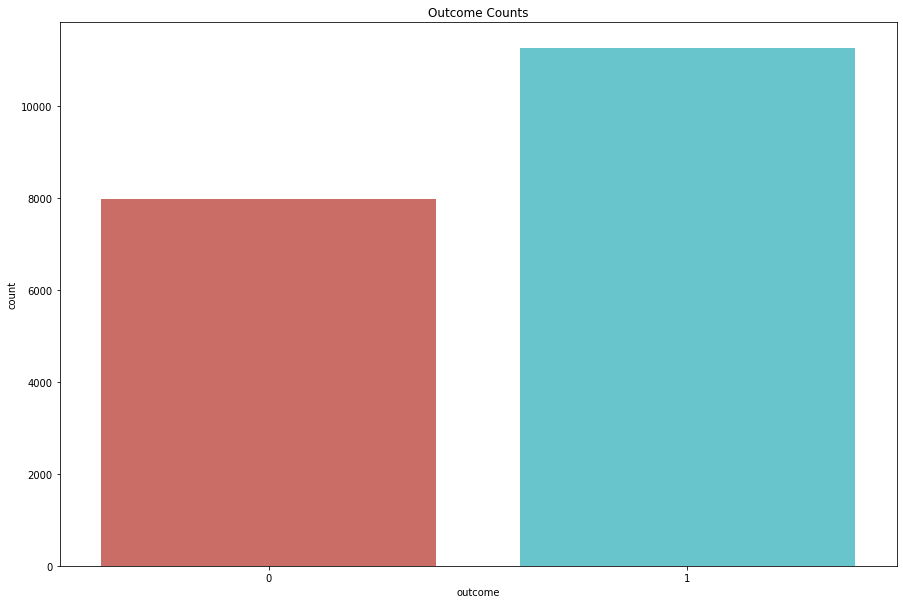

In [43]:
sns.countplot(x='outcome', data=df, palette = 'hls').set_title('Outcome Counts')

OHE offensive formation

In [44]:
processed = df[['gameId', 'playId', 'quarter', 'down', 'yardsToGo','yardlineNumber', 'defendersInTheBox',
       'numberOfPassRushers', 'preSnapVisitorScore', 'preSnapHomeScore',
       'absoluteYardlineNumber', 'offensePlayResult', 'playResult', 'epa', 'outcome']].copy()

In [45]:
processed.head()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,offensePlayResult,playResult,epa,outcome
0,2018090600,75,1,1,15,20,7.0,4.0,0.0,0.0,90.0,10,10,0.261827,1
1,2018090600,146,1,1,10,39,7.0,4.0,0.0,0.0,49.0,0,0,-0.372360,0
2,2018090600,168,1,2,10,39,6.0,4.0,0.0,0.0,49.0,0,0,-0.702779,0
3,2018090600,190,1,3,10,39,6.0,5.0,0.0,0.0,49.0,33,33,3.047530,1
4,2018090600,256,1,3,1,1,8.0,6.0,0.0,0.0,11.0,0,0,-0.842272,0


In [46]:
target = processed['outcome']

In [49]:
df_copy1.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [54]:
data_cat = df_copy1[['offenseFormation', 'personnelO', 'personnelD']]
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   offenseFormation_EMPTY  offenseFormation_I_FORM  offenseFormation_JUMBO  \
0                       0                        1                       0   
1                       0                        0                       0   
2                       0                        0                       0   
3                       0                        0                       0   
4                       0                        0                       0   
5                       0                        0                       0   
6                       1                        0                       0   
7                       0                        0                       0   

   offenseFormation_PISTOL  offenseFormation_SHOTGUN  \
0                        0                         0   
1                        0                         0   
2                        0                         1   
3                        0                         1   
4                

In [ ]:
cat_columns = ['offenseFormation', 'personnelD', 'personnelO', 'passResult']
cat_dummies = [col for col in processed 
               if "__" in col 
               and col.split("__")[0] in cat_columns]
processed = pd.get_dummies(df, prefix_sep="__",
                              columns=cat_columns)

In [ ]:
processed.head()

In [ ]:
for col in processed.columns: 
    print(col) 

Dropping variables that we are not are interested in analyize

In [ ]:
processed = processed.drop('playDescription', axis = 1)

In [ ]:
processed = processed.drop('possessionTeam', axis = 1)

In [ ]:
processed = processed.drop('playType', axis = 1)

In [ ]:
processed = processed.drop('yardlineSide', axis = 1)

In [ ]:
processed = processed.drop('typeDropback', axis = 1)

In [ ]:
processed = processed.drop('gameClock', axis = 1)

In [ ]:
processed = processed.drop('penaltyCodes', axis = 1)

In [ ]:
processed = processed.drop('penaltyJerseyNumbers', axis = 1)

In [ ]:
processed = processed.drop('offensePlayResult', axis = 1)

In [ ]:
processed = processed.drop('playResult', axis = 1)

In [ ]:
processed = processed.drop('isDefensivePI', axis = 1)

In [ ]:
processed = processed.drop('gameId', axis = 1)

In [ ]:
processed.head()

In [ ]:
for col in processed.columns: 
    print(col) 

### Missing values


The criteria used to handling missing values is to drop the rows that has them, this criteria was decided after analysis and conclude that plays with missing data is not a play the we can analyze and does not aport information to the data set

In [ ]:
processed = processed.dropna(axis=1)

In [ ]:
processed.reset_index()

In [ ]:
#Checking if we have any NaN value left
processed.isnull().sum().sum()

## Correlation

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [58]:
chi2_selector = SelectKBest(chi2, k =2)
features_kbest = chi2_selector.fit_transform(data_cat_dummies, target)

In [60]:
print('Original # Features', data_cat_dummies.shape[1])
print('reduced # features', features_kbest.shape[1])

Original # Features 119
reduced # features 2


In [ ]:
corr = processed["playId"].corr(processed["outcome"])
print(corr)

In [ ]:
corrdf = processed.corr()

In [ ]:
positivec = corrdf[corrdf["outcome"]>=0.05]

In [ ]:
positivec

In [ ]:
negativec = corrdf[corrdf["outcome"]<= -0.1]

In [ ]:
negativec

In [ ]:
import seaborn as sns

corr = processed.corr(method="pearson")
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale= 1.1)
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(20, 220, n=50), square=True, cbar_kws={"shrink": 0.5})
plt.title('Correlation Heat Map', fontsize = 5)
plt.show()

## PCA for feture reduction

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
features = processed.loc[:, processed.columns != 'outcome']

In [ ]:
x = features.values
y = processed.loc[:, ['outcome']].values

In [ ]:
features = x
target = y

lda = LinearDiscriminantAnalysis(n_components = 5)
features_lda = lda.fit(features, target).transform(features)

print('Original # of Features', features.shape[1])
print('reduced # of features', features_lda.shape[1])

## Split into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
data_model_y = processed.replace({'outcome': {1: 'Yard gained', 0: 'No Yard gained'}})['outcome']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(processed.loc[:, processed.columns != 'outcome'],
                                                    data_model_y, test_size =0.7, random_state=22, stratify=processed['outcome'])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [ ]:
model = LogisticRegression()

In [ ]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(model, classes=classes, percent=False)

cm.fit(X_train, y_train)

cm.score(X_val, y_val)

for label in cm.ax.texts:
    label.set_size(30)

cm.poof()

In [ ]:
# Precision, Recall, and F1 Score

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20


visualizer = ClassificationReport(model, classes=classes)

visualizer.score(X_val, y_val) 
g = visualizer.poof()

# ROC and AUC

visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_val, y_val) 
g = visualizer.poof()

## K-Nearest Neightbors

K-nearest neighbor classifier s going to be used in this problem, this algorithm will predict the observation to be in one class or the other one depening on the closer class of other obvservation. For this model We used our textbook (Albon. 2018. p254)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
nearest_n = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)

In [ ]:
nearest_n.predict(X_val)

In [ ]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(nearest_n, classes=classes, percent=False)

cm.score(X_val, y_val)

for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

In [ ]:
# Precision, Recall, and F1 Score

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20


visualizer = ClassificationReport(nearest_n, classes=classes)

visualizer.score(X_val, y_val) 
g = visualizer.poof()


visualizer = ROCAUC(nearest_n)

visualizer.score(X_val, y_val) 
g = visualizer.poof()

## Random Forest Classifier


Third option a Random Forest Classifier, this model will be used because is another option for classification problem (Albon. 2018 p 238)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_f = RandomForestClassifier()
model = random_f.fit(X_train, y_train)

In [ ]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(model, classes=classes, percent=False)

cm.score(X_val, y_val)

for label in cm.ax.texts:

    cm.poof()

In [ ]:
# Precision, Recall, and F1 Score

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20


visualizer = ClassificationReport(model, classes=classes)

visualizer.score(X_val, y_val) 
g = visualizer.poof()


visualizer = ROCAUC(model)

visualizer.score(X_val, y_val)  
g = visualizer.poof()